# Case Study: Fast Food

Case Study Objective: Understanding Market Segments and Brand Perceptions at McDonald's

Goal: Identify and analyze distinct consumer segments based on their perceptions of McDonald's. This analysis aims to discern whether there are systematic differences in how various segments perceive the McDonald's brand.

Focus:

Identify Positive Segments: Recognize segments that have a favorable view of McDonald's. Understand the key attributes contributing to this positive image and explore strategies to reinforce these perceptions.
Address Negative Perceptions: Identify segments that perceive McDonald's negatively. Analyze the main factors driving these adverse perceptions and develop actionable strategies to address and modify these views.
Utility:
This segmentation and perception analysis will help McDonald's tailor marketing strategies more effectively, focusing on enhancing brand image, improving customer satisfaction, and ultimately driving better business outcomes.

Method:
We will use clustering techniques to segment the consumer base ,PCA,   regression to identify the significant predictors of negative versus positive perceptions.

Data Attributes Used:

Food characteristics: 'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'
Consumer behaviors and demographics: 'Like', 'VisitFrequency', 'Age', 'Gender'


importing important liberiries

In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [393]:
df=pd.read_csv('mcdonalds.csv')

In [394]:
df.sample(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1299,No,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,58,Every three months,Female
1001,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+4,38,Once a month,Female
224,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,-4,60,Once a year,Female
1411,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+2,55,Once a year,Female
19,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,I love it!+5,37,More than once a week,Male


In [395]:
df.shape

(1453, 15)

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [397]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

# Univariate Analysis

Based On Age

In [398]:
df['Age'].describe()

count    1453.000000
mean       44.604955
std        14.221178
min        18.000000
25%        33.000000
50%        45.000000
75%        57.000000
max        71.000000
Name: Age, dtype: float64

In [399]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f'The outliers are: {outliers}')

The outliers are: Empty DataFrame
Columns: [yummy, convenient, spicy, fattening, greasy, fast, cheap, tasty, expensive, healthy, disgusting, Like, Age, VisitFrequency, Gender]
Index: []


no outliers in age column 

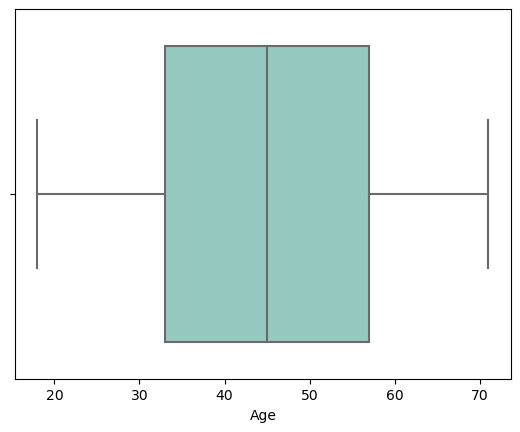

In [400]:
sns.boxplot(x=df['Age'])
plt.show()

In [401]:
age_18_25 = df[df['Age'].between(18, 25)]['Age'].count()
age_26_35 = df[df['Age'].between(26, 35)]['Age'].count()
age_36_45 = df[df['Age'].between(36, 45)]['Age'].count()
age_46_55 = df[df['Age'].between(46, 55)]['Age'].count()
age_55plus = df[df['Age'] >= 55]['Age'].count()

In [402]:
age_18_25

172

In [403]:
x_values = ['18-25', '26-35', '36-45', '46-55','56+']
counts = [age_18_25,age_26_35, age_36_45, age_46_55, age_55plus]


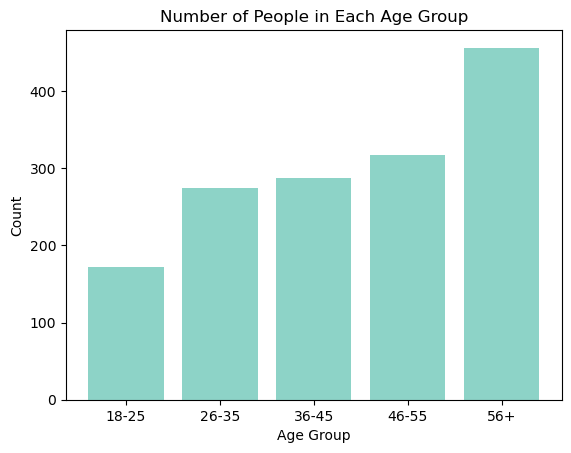

In [404]:
plt.bar(x_values, counts)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Number of People in Each Age Group')
plt.show()


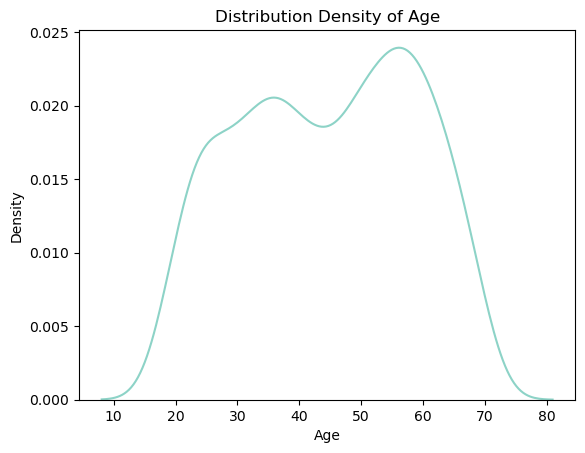

In [405]:
sns.kdeplot(data=df, x='Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution Density of Age')
plt.show()

Gender Distribution

In [406]:
df['Gender'].describe()

count       1453
unique         2
top       Female
freq         788
Name: Gender, dtype: object

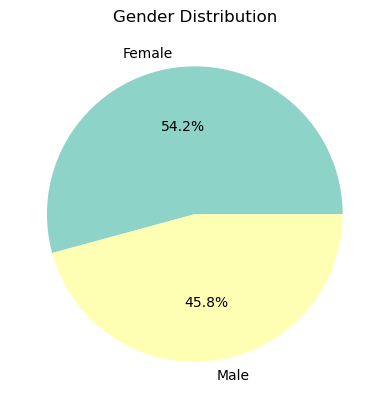

In [407]:
plt.title('Gender Distribution')
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

Likes

In [408]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Like_encoded'] = encoder.fit_transform(df['Like'])
df['Like'] = df['Like_encoded']


In [409]:
df['Like'].describe()

count    1453.000000
mean        4.636614
std         3.446175
min         0.000000
25%         2.000000
50%         3.000000
75%         8.000000
max        10.000000
Name: Like, dtype: float64

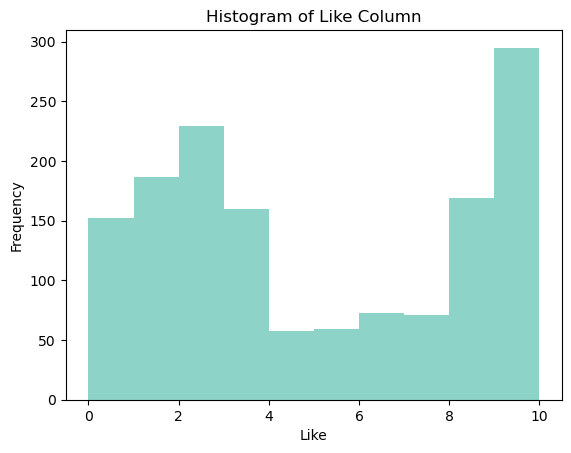

In [410]:
plt.hist(df['Like'], bins=10)
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.title('Histogram of Like Column')
plt.show()

Expensive

In [411]:
df['expensive'].value_counts()

expensive
No     933
Yes    520
Name: count, dtype: int64

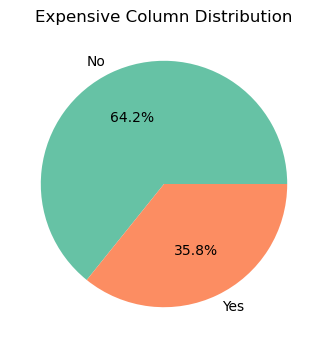

In [412]:
expensive_counts = df['expensive'].value_counts()
plt.figure(figsize=(4, 4))
sns.set_palette("Set2")
plt.pie(expensive_counts, labels=expensive_counts.index, autopct='%1.1f%%')
plt.title('Expensive Column Distribution')
plt.show()

convenient

In [413]:
df['convenient'].value_counts()

convenient
Yes    1319
No      134
Name: count, dtype: int64

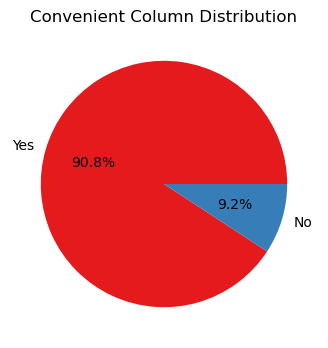

In [414]:
convenient_counts = df['convenient'].value_counts()
plt.figure(figsize=(4, 4))
sns.set_palette("Set1")
plt.pie(convenient_counts, labels=convenient_counts.index, autopct='%1.1f%%')
plt.title('Convenient Column Distribution')
plt.show()

disgusting

In [415]:
df['disgusting'].value_counts()

disgusting
No     1100
Yes     353
Name: count, dtype: int64

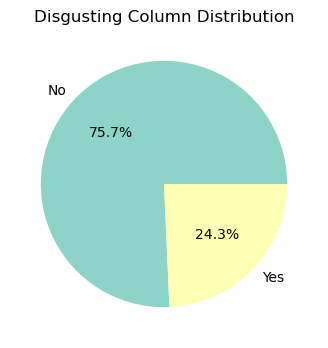

In [416]:
disgusting_counts = df['disgusting'].value_counts()
plt.figure(figsize=(4, 4))
sns.set_palette("Set3")
plt.pie(disgusting_counts, labels=disgusting_counts.index, autopct='%1.1f%%')
plt.title('Disgusting Column Distribution')
plt.show()

Tasty

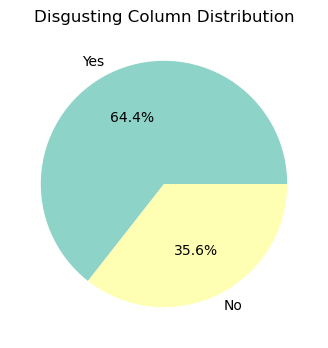

In [417]:
tasty_counts = df['tasty'].value_counts()
plt.figure(figsize=(4, 4))
sns.set_palette("Set3")
plt.pie(tasty_counts, labels=tasty_counts.index, autopct='%1.1f%%')
plt.title('Disgusting Column Distribution')
plt.show()

PCA

In [418]:
df_new.iloc[:, :11] = df.iloc[:, :11].replace({'Yes': 1, 'No': 0})

In [419]:
df_new[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']] = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']].replace({'Yes': 1, 'No': 0})


In [420]:
df_new.dtypes

yummy         int64
convenient    int64
spicy         int64
fattening     int64
greasy        int64
fast          int64
cheap         int64
tasty         int64
expensive     int64
healthy       int64
disgusting    int64
dtype: object

In [421]:
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [422]:
# PCA analysis
pca_data=preprocessing.scale(df_new)
pca = PCA(n_components=11)
df_pca = pca.fit_transform(df_new)
print("PCA value: ",pca.explained_variance_ratio_)
print('standard deviation: ',np.sqrt(pca.explained_variance_ratio_))

PCA value:  [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
standard deviation:  [0.54721772 0.4390868  0.36475382 0.28826338 0.24388629 0.22427564
 0.20940177 0.19886626 0.19173132 0.17987021 0.17124036]


In [423]:
df_pc=pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
df_pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [426]:
std_dev = np.sqrt(pca.explained_variance_)
prop_var = pca.explained_variance_ratio_
cum_var = np.cumsum(pca.explained_variance_ratio_)

In [427]:
results_df = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Proportion of Variance': prop_var,
    'Cumulative Proportion': cum_var
})

print(results_df)

    Standard Deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000


In [428]:
std_dev = np.sqrt(pca.explained_variance_)
print("Standard deviations (1, .., p=11):")
print(std_dev.round(1))  
print("\nRotation (n x k) = (11 x 11):")
rotation_matrix = pd.DataFrame(pca.components_, columns=df_new.columns, index=[f'PC{i+1}' for i in range(11)])
print(rotation_matrix.round(1)) 

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation (n x k) = (11 x 11):
      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
PC1    -0.5        -0.2   -0.0        0.1     0.3  -0.1   -0.3   -0.5   
PC2     0.4         0.0    0.0       -0.0    -0.1  -0.1   -0.6    0.3   
PC3    -0.3        -0.1   -0.0       -0.3    -0.8  -0.1   -0.1   -0.3   
PC4     0.1        -0.1    0.2       -0.4     0.3  -0.1    0.1   -0.0   
PC5    -0.3         0.3    0.1       -0.1     0.4   0.1   -0.1   -0.2   
PC6     0.2        -0.3   -0.4       -0.4     0.2  -0.6   -0.1   -0.1   
PC7    -0.3        -0.1    0.7       -0.4     0.0  -0.1   -0.0    0.4   
PC8     0.0        -0.1    0.4        0.6    -0.1  -0.6    0.1   -0.1   
PC9     0.6        -0.0    0.4       -0.2    -0.0   0.2    0.1   -0.6   
PC10   -0.1        -0.7   -0.1       -0.0     0.0   0.2    0.4    0.1   
PC11    0.0        -0.5    0.1        0.3     0.0   0.3   -0.5    0.0   

      expen

In [429]:
pca = PCA(n_components=10)
principal_components = pca.fit_transform(df_new)

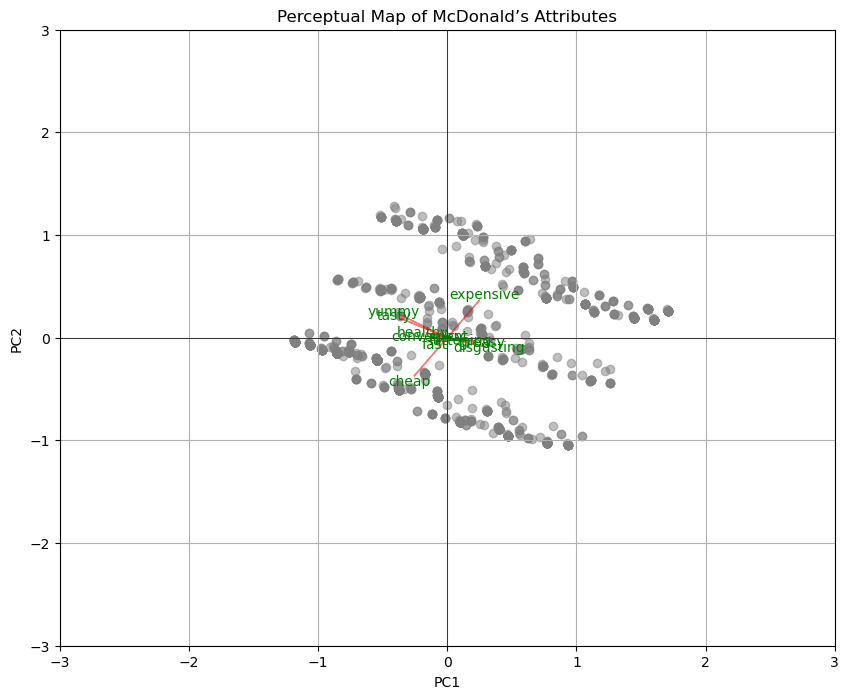

In [430]:
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], color='grey', alpha=0.5)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, feature in enumerate(df_new.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='g', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Perceptual Map of McDonald’s Attributes')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()


In [377]:
from sklearn.cluster import KMeans

In [434]:
wcss=[]
for k in range(2,9):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)
print(wcss)

[2145.5037269171667, 1841.577413776405, 1604.2522242051873, 1435.2414868480314, 1419.5580679546763, 1258.7424476283552, 1205.7252669138763]


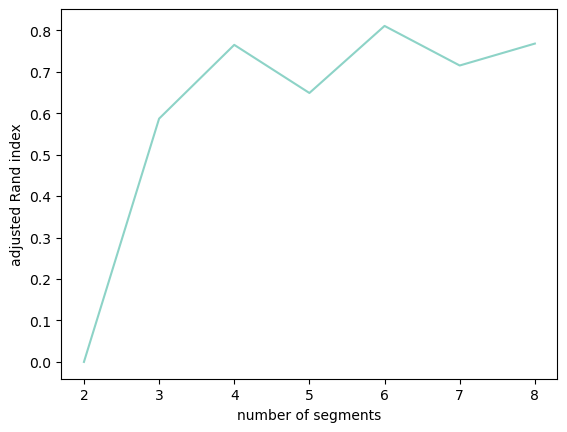

In [435]:

from sklearn.metrics import adjusted_rand_score
np.random.seed(1234)
clusters_range = range(1, 9)
df_km28 = [KMeans(n_clusters=k, n_init=10).fit(df_new) for k in clusters_range]
df_b28 = [adjusted_rand_score(df_km28[i].labels_, df_km28[i-1].labels_) for i in range(1, len(df_km28))]
plt.plot(clusters_range[1:], df_b28)
plt.xlabel('number of segments')
plt.ylabel('adjusted Rand index')
plt.show()

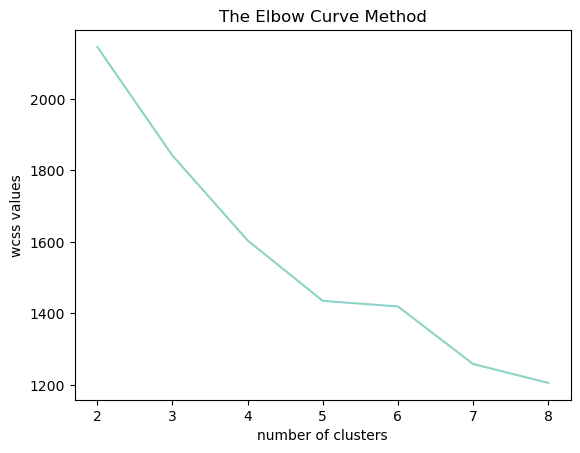

In [436]:
# visualize the Elbow Curve
plt.plot(range(2,9),wcss)
plt.xticks(range(2,9))
plt.title('The Elbow Curve Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss values')
plt.show()

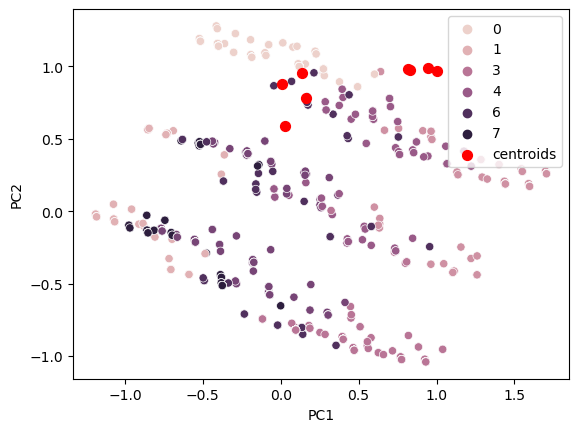

In [437]:
sns.scatterplot(x='PC1',y='PC2',data=df_pc,hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r',s=50,label='centroids')
plt.legend()
plt.show()

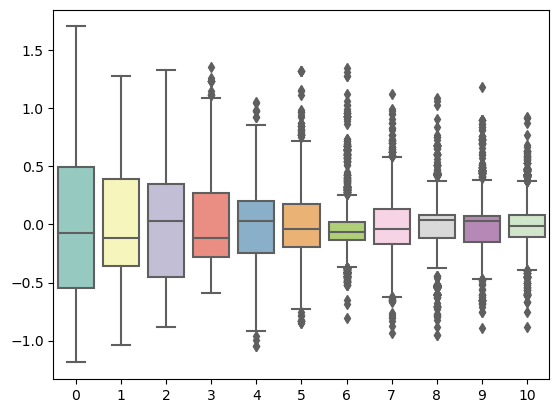

In [438]:
sns.boxplot(df_pca)
plt.show()

In [439]:
from scipy.spatial.distance import cdist

In [440]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_new)
centroids = kmeans.cluster_centers_ 

In [441]:
distances = cdist(df_new, centroids, 'euclidean')
gamma = 1
exp_distances = np.exp(-np.power(distances, gamma))
similarities = exp_distances / exp_distances.sum(axis=1, keepdims=True)

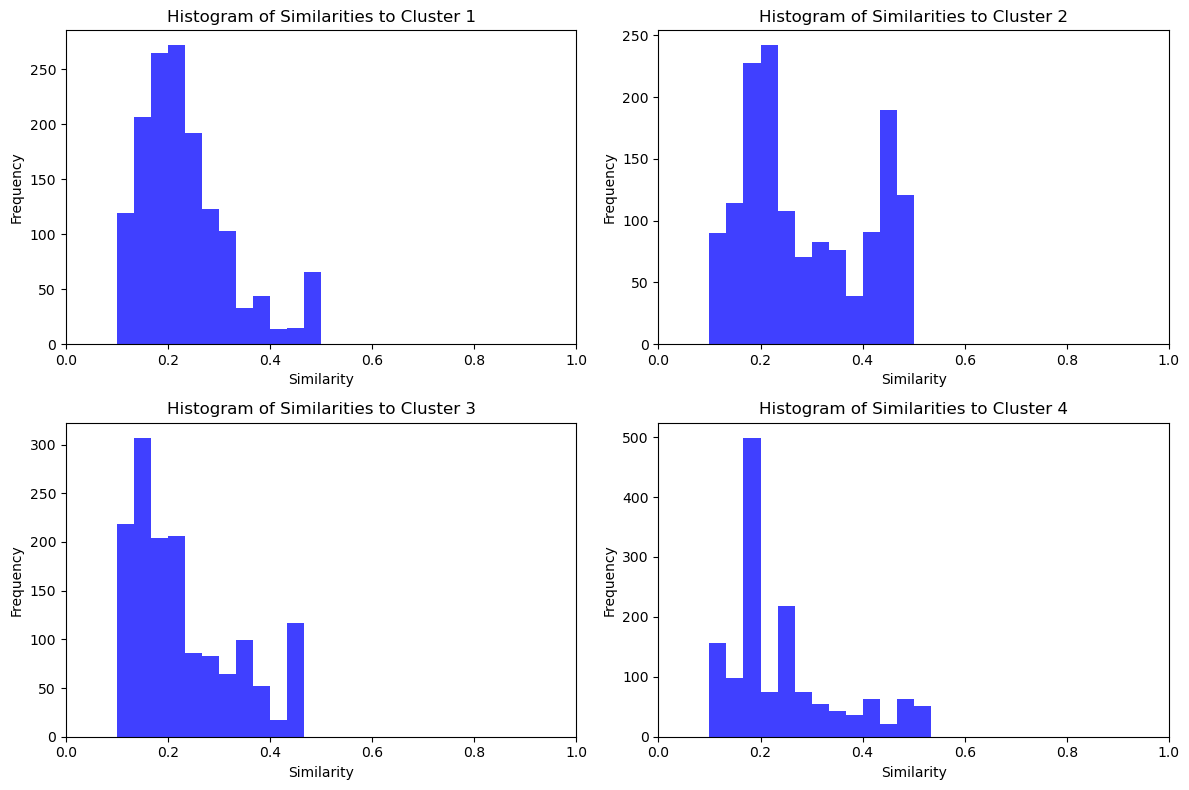

In [442]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8)) 

axes = axes.flatten()
for i in range(4):  
    ax = axes[i]
    ax.hist(similarities[:, i], bins=30, range=(0, 1), color='blue', alpha=0.75)
    ax.set_title(f'Histogram of Similarities to Cluster {i + 1}')
    ax.set_xlabel('Similarity')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()


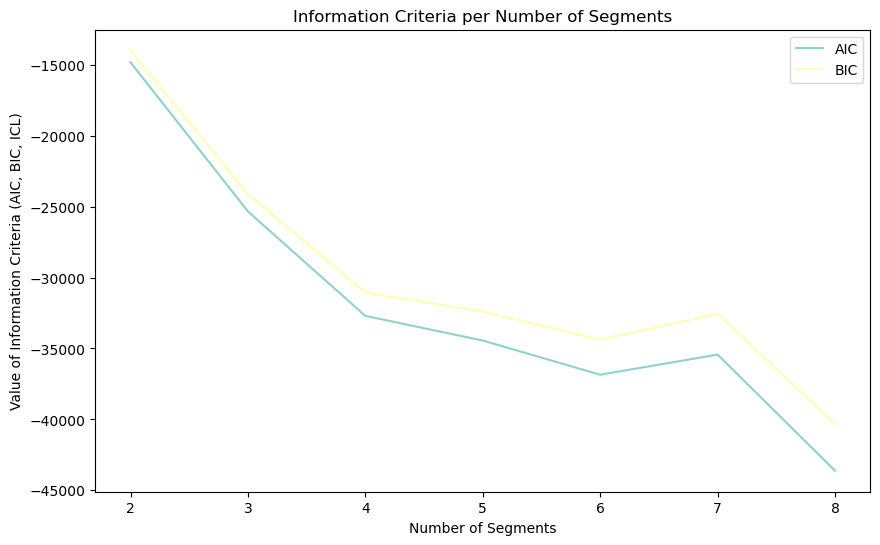

In [443]:
from sklearn.mixture import GaussianMixture
aic, bic, icl = [], [], []
n_components_range = range(2, 9)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df_new)
    aic.append(gmm.aic(df_new))
    bic.append(gmm.bic(df_new))
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic, label='AIC')
plt.plot(n_components_range, bic, label='BIC')
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.title('Information Criteria per Number of Segments')
plt.legend()
plt.show()


In [444]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(df_new)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_new)
df = pd.DataFrame({'GMM': gmm_labels, 'KMeans': kmeans_labels})
ct = pd.crosstab(df['GMM'], df['KMeans'])
print(ct)

KMeans    0    1    2    3
GMM                       
0       179   33  119   15
1         9  559   10   16
2         9    9   46   15
3         0    0  170  264
